### Import Libaries

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import data

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning

In [5]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True,errors='ignore')

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
df.rename(columns = {'v1':'target', 'v2' : 'Text' }, inplace=True )
df.head()

,target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

target    0
Text      0
dtype: int64

In [11]:
df.duplicated().sum()

403

In [12]:
df.drop_duplicates(keep='first', inplace=True)
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.shape

(5169, 2)

# EDA

In [14]:
df.head()

,target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

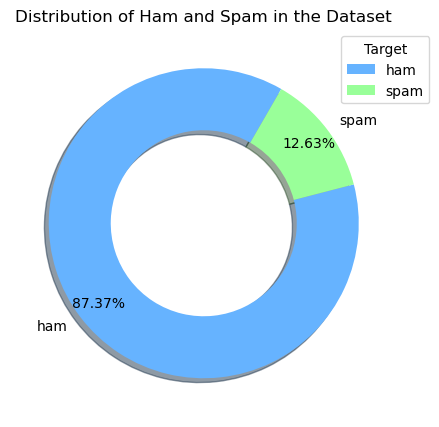

In [16]:
plt.figure(figsize=(5, 20))
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%1.2f%%',
        pctdistance=0.85, shadow=True, startangle=60, colors=['#66b3ff', '#99ff99'], wedgeprops=dict(width=0.4))
plt.legend(title='Target', loc='upper right', bbox_to_anchor=(1.1, 1))
plt.title('Distribution of Ham and Spam in the Dataset')
plt.show()

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAVEEN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# Fetch length of Text
df['Text_len'] = df['Text'].apply(len)
df.head()

,target,Text,Text_len
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# Fetch number of words in Text
df['Text_words_count'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,Text,Text_len,Text_words_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
# Fetch number of sentences in Text
df['Text_sentences_count'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,Text,Text_len,Text_words_count,Text_sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
num_col = ['Text_len','Text_words_count','Text_sentences_count']
df[num_col].describe()

,Text_len,Text_words_count,Text_sentences_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [23]:
#discribe of ham messages
df[df['target']==0][num_col].describe()

,Text_len,Text_words_count,Text_sentences_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [24]:
#discribe of spam messages
df[df['target']==1][num_col].describe()

,Text_len,Text_words_count,Text_sentences_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


### visualization

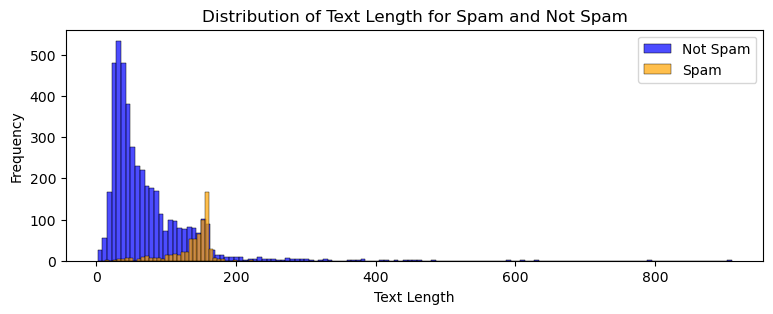

In [43]:
plt.figure(figsize=[9, 3])

# Plotting histograms for Text_len with different target values
sns.histplot(df[df['target'] == 0]['Text_len'], label='Not Spam', color='blue', alpha=0.7)
sns.histplot(df[df['target'] == 1]['Text_len'], label='Spam', color='orange', alpha=0.7)

# Adding labels and title
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length for Spam and Not Spam')
plt.legend()
plt.show()

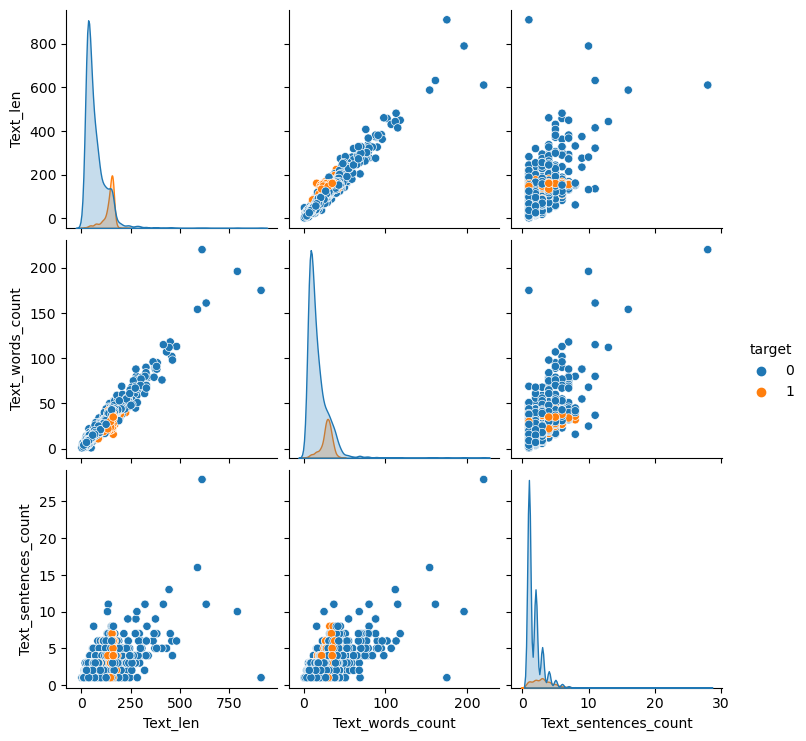

In [46]:
sns.pairplot(df,hue='target')
plt.show()

C:\Users\NAVEEN\AppData\Local\Temp\ipykernel_21200\4219391443.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


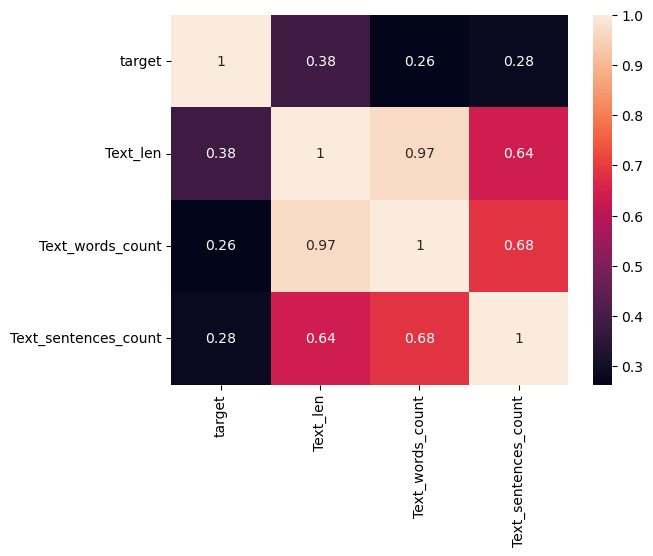

In [48]:
# lets see in heat map

sns.heatmap(df.corr(),annot=True)
plt.show()

# Data Preprocessing

1) Lower case
2) Tokenization
3) Removing special characters
4) Removing stop words and punctuation
5) stemming

In [70]:
# to insiall stopwords
# nltk.download('stopwords')

In [93]:
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [91]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [96]:
df['Transformed Text'] = df['Text'].apply(transform_text)

In [106]:
# pip install wordcloud

In [113]:
from wordcloud import WordCloud
wc = WordCloud(width=600,height=300,background_color='white',min_font_size=10)

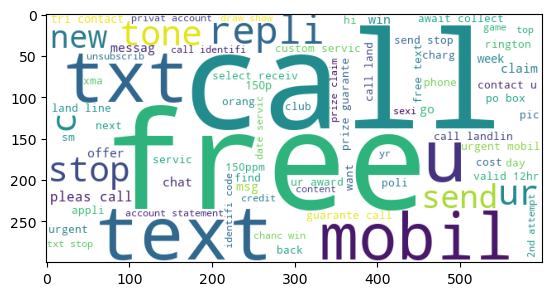

In [116]:
spam_wc = wc.generate(df[df['target']==1]['Transformed Text'].str.cat(sep=" "))
plt.imshow(spam_wc)
plt.show()

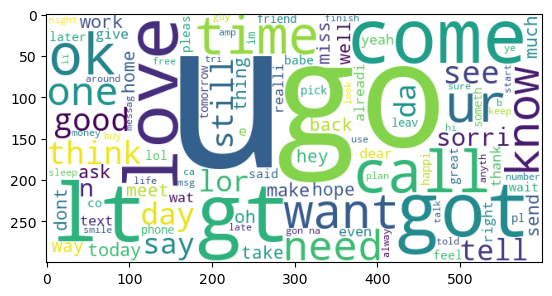

In [119]:
ham_wc = wc.generate(df[df['target']==0]['Transformed Text'].str.cat(sep=" "))
plt.imshow(ham_wc)
plt.show()

In [120]:
df

,target,Text,Text_len,Text_words_count,Text_sentences_count,Transformed Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [154]:
# counter creates dictionary
from collections import Counter

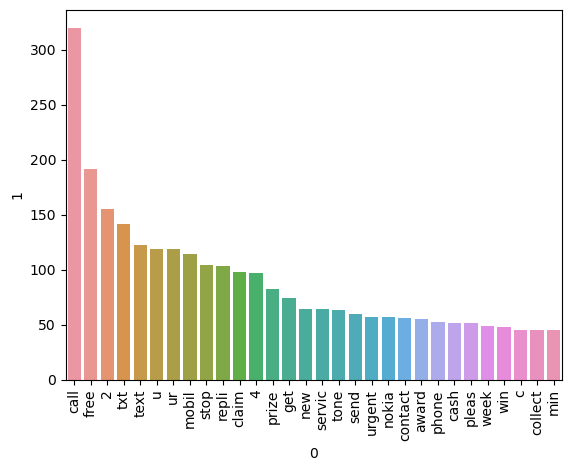

9939

In [159]:
spam_corpus = []
for msg in df[df['target']  == 1 ]['Transformed Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
data = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(data, x = data[0], y= data[1])
plt.xticks(rotation='vertical')
plt.show();        
len(spam_corpus)

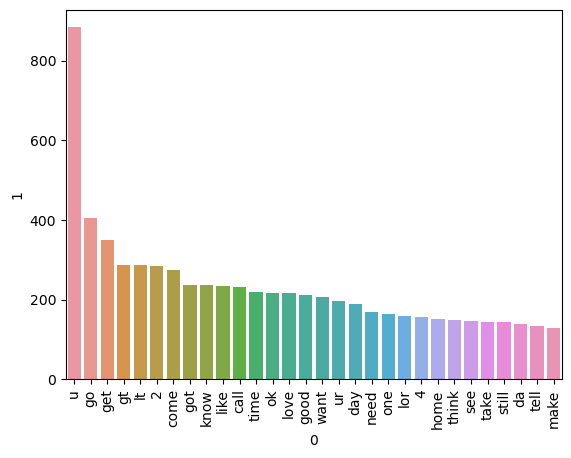

35394

In [158]:
ham_corpus = []
for msg in df[df['target']  == 0 ]['Transformed Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

data = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(data, x = data[0], y= data[1])
plt.xticks(rotation='vertical')
plt.show();
len(ham_corpus)

# Model Building

In [161]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [165]:
X = cv.fit_transform(df['Transformed Text']).toarray()

In [166]:
X.shape

(5169, 6708)

In [169]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [170]:
from sklearn.model_selection import train_test_split

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2) 

In [172]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [175]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [178]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict

GaussianNB()